In [1]:
import warnings
warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt # for plotting
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
import numpy as np

# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [2]:
CATEGORIES = [
 '01_fist',
 '02_thumbs-up',
 '03_thumbs-down',
 '04_no-gesture']

IMG_SIZE = 120

# paths for dataset
data_path = "C:\\Users\\kalpa\\Desktop\\data\\data\\train"

In [3]:
# Loading the images and their class(0 - 9)
image_data = []

In [4]:
                      
for category in CATEGORIES:
    # Get the index of the category
    class_index = CATEGORIES.index(category)
    # Print the class index
    print(class_index)
    # Construct path to the current category folder using os.path.join()
    path = os.path.join(data_path, category)
    # Print the path
    print(path)
    # Iterate through each image in the current category folder
    for img_name in os.listdir(path):
        try:
            # Construct full path to the image
            img_path = os.path.join(path, img_name)
            # Read the image in grayscale
            img_arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            # Resize the image
            resized_img = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
            # Append the resized image and its class index to image_data
            image_data.append([resized_img, class_index])
        except Exception as e:
            # If there's any error, skip the image
            pass

0
C:\Users\kalpa\Desktop\data\data\train\01_fist
1
C:\Users\kalpa\Desktop\data\data\train\02_thumbs-up
2
C:\Users\kalpa\Desktop\data\data\train\03_thumbs-down
3
C:\Users\kalpa\Desktop\data\data\train\04_no-gesture


In [5]:
# shuffle the input data
import random
random.shuffle(image_data)

In [6]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

In [7]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(983, 120, 120)

In [8]:
# # one hot encoding
# label = keras.utils.to_categorical(label, num_classes=4,dtype='i1')
# label[0]


from tensorflow.keras.utils import to_categorical

# Assuming 'label' is your array of class labels
#label = to_categorical(label, num_classes=4, dtype='i1')
label = np.array(label, dtype='i1')  # Convert label array to numpy array with dtype 'i1'
label = to_categorical(label, num_classes=4)

# Building the cnn

In [9]:
# reshaping the data
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

In [10]:
# splitting the input_data to train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD

model = Sequential()

# First convolutional layer
model.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='valid', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

# Second convolutional layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

# Third convolutional layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# Fourth convolutional layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# Fifth convolutional layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

# Flatten the convolutional layers output for fully connected layers
model.add(Flatten())

# Fully connected layer 1
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# Fully connected layer 2
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(4, activation='softmax'))

# Define the optimizer with specific learning rate and momentum
optimizer = SGD(learning_rate=0.01, momentum=0.9)

# Compile the model with the specified optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


In [26]:
history=model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/7
22/22 [==============================] - 7s 303ms/step - loss: 0.0318 - accuracy: 0.9985 - val_loss: 0.1029 - val_accuracy: 0.9831
Epoch 2/7
22/22 [==============================] - 7s 300ms/step - loss: 0.0277 - accuracy: 0.9971 - val_loss: 0.1051 - val_accuracy: 0.9797
Epoch 3/7
22/22 [==============================] - 7s 302ms/step - loss: 0.0171 - accuracy: 0.9985 - val_loss: 0.0602 - val_accuracy: 0.9831
Epoch 4/7
22/22 [==============================] - 7s 303ms/step - loss: 0.0149 - accuracy: 0.9985 - val_loss: 0.0639 - val_accuracy: 0.9797
Epoch 5/7
22/22 [==============================] - 7s 306ms/step - loss: 0.0170 - accuracy: 0.9956 - val_loss: 0.0741 - val_accuracy: 0.9831
Epoch 6/7
22/22 [==============================] - 7s 314ms/step - loss: 0.0126 - accuracy: 0.9971 - val_loss: 0.0516 - val_accuracy: 0.9864
Epoch 7/7
22/22 [==============================] - 7s 319ms/step - loss: 0.0267 - accuracy: 0.9942 - val_loss: 0.0389 - val_accuracy: 0.9898


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 96)        11712     
_________________________________________________________________
activation (Activation)      (None, 28, 28, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 256)       614656    
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 384)         8

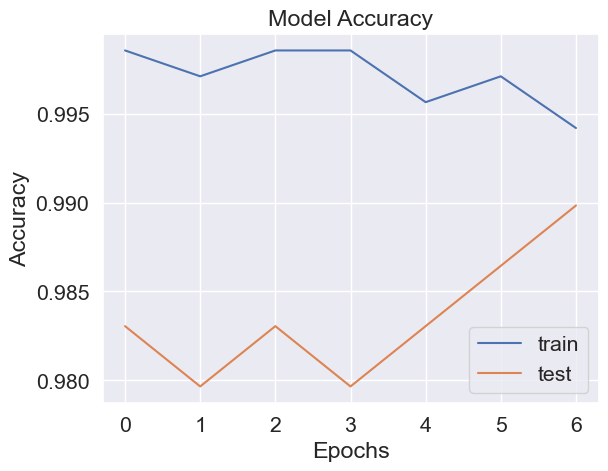

In [29]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])


In [30]:
#calculate loss and accuracy on test data

test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

10/10 [==============================] - 0s 44ms/step - loss: 0.0389 - accuracy: 0.9898
Test accuracy: 98.98%


In [34]:
model_json = model.to_json()
with open("visual-model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights('visual-model.h5')

In [35]:
import numpy as np
from keras.models import model_from_json
import operator
import cv2
import sys, os
import pyautogui
import time

In [36]:
json_file = open("visual-model.json", "r")
model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(model_json)
# load weights into new model
loaded_model.load_weights("visual-model.h5")
print("Loaded model from disk")

Loaded model from disk


In [37]:
final_label = ""
action=""

In [38]:
vid = cv2.VideoCapture(0)
while (vid.isOpened()):

    ret,frame = vid.read()
    if ret:
            frame = cv2.flip(frame, 1)

            # Got this from collect-data.py
            # Coordinates of the ROI
            x1 = int(0.5*frame.shape[1])
            y1 = 10
            x2 = frame.shape[1]-10
            y2 = int(0.5*frame.shape[1])
            # Drawing the ROI
            # The increment/decrement by 1 is to compensate for the bounding box
            cv2.rectangle(frame, (x1-1, y1-1), (x2+1, y2+1), (255,0,0),3)
            # Extracting the ROI
            roi = frame[y1:y2, x1:x2]

            # Resizing the ROI so it can be fed to the model for prediction
            roi = cv2.resize(roi, (120, 120))
            roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
            _, test_image = cv2.threshold(roi, 130, 255, cv2.THRESH_BINARY)
            cv2.imshow("Test Image", test_image)
            result = loaded_model.predict(test_image.reshape(1, 120, 120, 1))
            prediction = {
                          'fist': result[0][0],
                          'thumbs-up': result[0][1],
                          'thumbs-down': result[0][2],
                          'no-gesture':result[0][3]}
            
                # Sorting based on top prediction
            prediction = sorted(prediction.items(), key=operator.itemgetter(1), reverse=True)

            if (prediction[0][0] == 'fist'):
                final_label = 'fist'
                action = "MUTE"
                pyautogui.press('volumemute', presses=1)
            elif (prediction[0][0] == 'thumbs-up'):
                final_label = "thumbs-up"
                action = "VOLUME UP"
                pyautogui.press('volumeup', presses=1)
            elif (prediction[0][0] == "thumbs-down"):
                final_label = "thumbs-down"
                action = "VOLUME DOWN"
                pyautogui.press('volumedown', presses=1)
            elif (prediction[0][0] == "no-gesture"):
                final_label = "no-gesture"
                action = "NO-ACTION"
                
            text1= "Gesture: {}".format(final_label)
            text2= "Action:{}".format(action)

            cv2.putText(frame, text1 , (10, 120), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
            cv2.putText(frame, text2 , (10, 220), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
            cv2.imshow("Hand Gesture Recognition", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
vid.release()
cv2.destroyAllWindows()